# Aufgabe 12
__Aufgabe:__ Fitten Sie an die gegebenen Daten Ellipsen an:

In [1]:
from numpy import array,load

daten=load('dataEllipse.npz')

Da wir mehrfach die gleichen Auswertungen vornehmen, schreiben wir uns eine Funktion, die das lineare Ausgleichsproblem aufstellt und löst.

In [2]:
from numpy import ones
from numpy.linalg import lstsq

def fit_ellipse_coeff(xData,yData):
    # rechte Seite des Gleichungsstems, gegeben durch x^2
    b=xData**2
    # Die Matrix hat die Spalten yData^2, xData*yData , xData, yData ,1
    n=max(xData.shape)
    A=ones([n,5])
    A[:,0]=yData**2
    A[:,1]=xData*yData
    A[:,2]=xData
    A[:,3]=yData
    x=lstsq(A,b)
    return x[0]

coeffTrue=fit_ellipse_coeff(daten['xtrue'],daten['ytrue'])
print(coeffTrue)

[ -2.   -0.5  -1.    1.   20. ]


Die ausgegebenen Daten geben Die Koeffizienten a,...,e der Ellipse an. Diese entsprechen auch tatsächlich den Werten die benutzt wurden um die Daten zu erstellen.

In [3]:
import matplotlib.pyplot as plt
from numpy import array, ogrid, broadcast_arrays

def plotEllipseData(xData,yData,ellipsenCoeff):
    # Input:
    # xData: Vektor, behinhaltet die x-Koordianten die zum fitten verwendet wurden
    # yData: Vektor, behinhaltet die y-Koordianten die zum fitten verwendet wurden
    # ellipsenCoeff: Vektor der Form [a,b,c,d,e]
    x,y=ogrid[-5.5:4.5:1000j,-4:4:1000j]
    x, y = broadcast_arrays(x, y)
    z=-x**2+ellipsenCoeff[0]*y**2+ellipsenCoeff[1]*x*y+ellipsenCoeff[2]*x+ellipsenCoeff[3]*y+ellipsenCoeff[4]
    
    plt.plot(xData,yData,'x')
    plt.contour(x,y,z,[0],colors='red')
    plt.show()
    return None    

Jetzt plotten wir alle vier Ellipsen und ihre zugehörigen Daten:

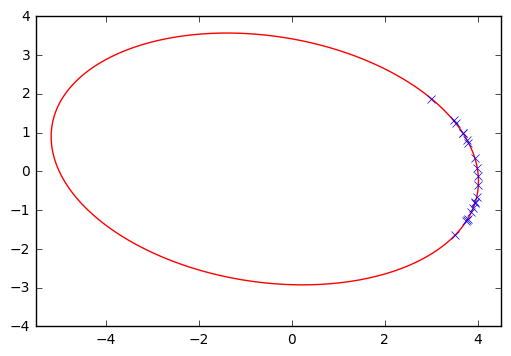

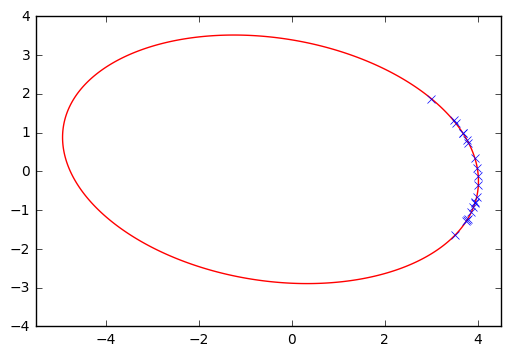

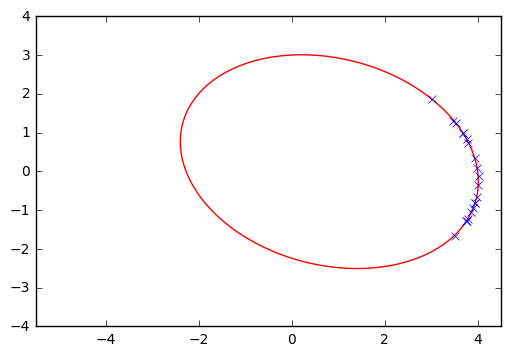

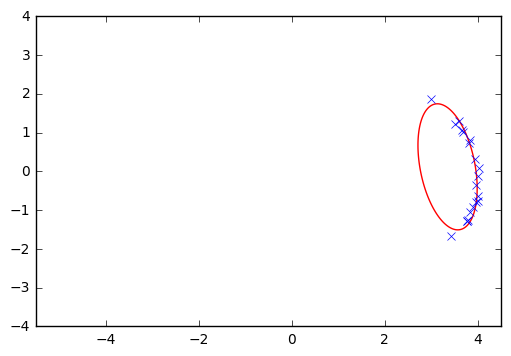

In [4]:
plotEllipseData(daten['xtrue'],daten['ytrue'],coeffTrue)
plotEllipseData(daten['x1'],daten['y1'],fit_ellipse_coeff(daten['x1'],daten['y1']))
plotEllipseData(daten['x2'],daten['y2'],fit_ellipse_coeff(daten['x2'],daten['y2']))
plotEllipseData(daten['x3'],daten['y3'],fit_ellipse_coeff(daten['x3'],daten['y3']))

Während der Unterschied zwischen den ersten beiden Ellipsen fast nicht sichtbar ist, unterscheiden sich die letzten beiden stark von der "wahren" Ellipse.